<a href="https://colab.research.google.com/github/amarbtsingh/first-contributions/blob/main/01_PyTorch_Workflow_Video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PyToch Workflow

Let explore and example of Pytorch Workflow

Resources
* Ground Truth - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb
* Book version of Notebook - https://www.learnpytorch.io/01_pytorch_workflow/
* Ask a question - https://github.com/mrdbourke/pytorch-deep-learning/discussions

In [81]:
what_were_covering = {1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}

what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [82]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for creating a neural network model
from matplotlib import pyplot as plt

#Check pytorch version
torch.__version__

'2.1.0+cu121'

## 1. Data (Prepare and Load)

Data can alsmost anything...

* Excel spreadsheet
* Image of any kind
* Videos, Viso Streams, Camera feeds
* Audio like - songs or pdocasts
* DNA
* Text etc.

Machine learning is a game of two parts:
1. Get the data into a numerical representation and
2. Build a model to lear pattern in that numerical representation

To showcase this lets create some *known* data using the linear regression formula.

`We'll use linear regression to create the data with known parameters (things that can be learned by a model) and then we'll use PyTorch to see if we can build model to estimate these parameters using gradient descent.`

We'll use the linear regression formula to create a straigt line with *known* **parameters**.

In [83]:
# Create *known* parameter
weight = 0.7  # b
bias = 0.3    # a

# Create
start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

print("X - ", X, X.shape)
print("y -", y, y.shape)

X -  tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800],
        [0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]]) torch.Size([50, 1])
y - tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420]

# Splitting data into training and testing sets ( one of the most important concepts in machine learning in general)

* Training set ( similar to Course Material for Student ) Always needed
* Validation set (similar to Practice Set for Student) Most often needed
* Test set (similar to Final exam for Student) Always needed

Let's create training and test set 80 : 20 ratio

In [84]:
# Create training set - first 80% of X
train_split = int(len(X) * 0.80)

X_train, y_train = X[ :train_split], y[ :train_split]
X_test, y_test = X[train_split: ], y[train_split: ]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

# Visualizing Data

How might we better understand Data?

This is where Data explorers motto comes in.

**Visualize, Visualize, Visualize**

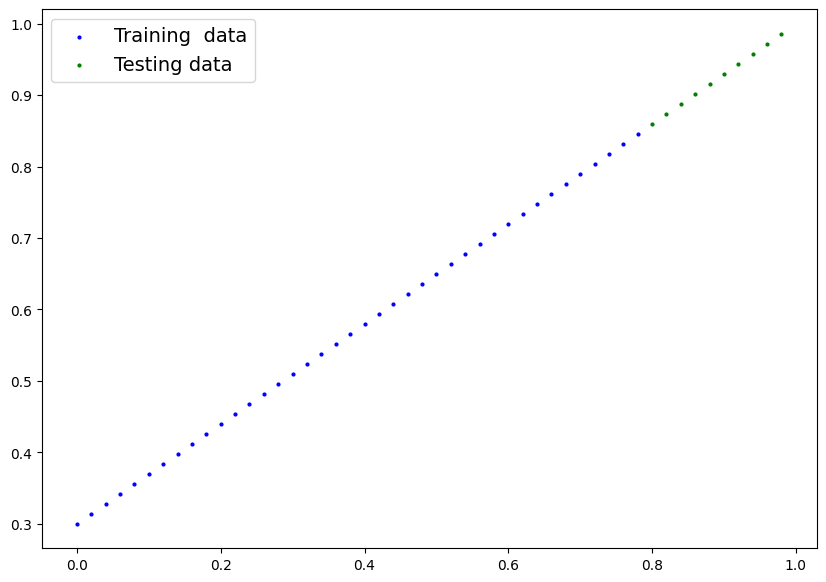

In [85]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in Blue
  plt.scatter(train_data, train_labels, c='b', s=4, label="Training  data")

  # Plot test data in Green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  # Are there predictions?
  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show Legend
  plt.legend(prop={"size": 14})

plot_predictions()

## 2. build model - Build our first PyTorch Model

It's a new and exciting biggining!

Because we will be building classes throughout the course...get acquinted with the OOP - https://realpython.com/python-classes/

More about nn.Module --> https://pytorch.org/docs/stable/generated/torch.nn.Module.html

What our model does:
* Starts with random values for weight & bias
* Looks at the data and adjusts the random values in such a way so as to get closer to the ideal value ( the weight and bias will be used to create the data )

How does it do so?

Through two main algorithms:
1. Gradient Descent and -- https://www.youtube.com/watch?v=IHZwWFHWa-w
2. Back Propagation   -- https://www.youtube.com/watch?v=Ilg3gGewQ5U

In [86]:
from torch import nn

# Create Linear Regression model class
class LinearRegressionModel(nn.Module): # <-- Almost everything in PyTorch inherits from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad= True,
                                            dtype= torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad= True,
                                         dtype= torch.float))

  # Forward method to define the calculation in the Model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # "x" is the input dats
    return self.weights * x + self.bias                # This is the linear regression formula

### PyTorch model building essentials

* torch.nn - contains all the building blocks for computational graphs ( a neural network can be considered a computational graph)
* torch.nn.Parameter - What parameters our model should try and learn, often a Pytorch layer from torch.nn will set these for us
* torch.nn.Module - The base class for all neural network modules, if you subclass it - you should override `forward()`
* torch.optim - This is where optimisers live, they halp gradient descent
* def forward() - All nn.Module subclasses require you to override forward()

Pytorch Cheat Sheet - https://pytorch.org/tutorials/beginner/ptcheat.html


## Checking the contents of PyTorch model

We can checkout whats inside our model using `.parameters`

In [87]:
# Create random seed
RAMDOM_SEED = 42

torch.manual_seed(42)

# Create an instance of model
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [88]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

## Making predictions using `torch.inference_mode()'

To check the model's predictive power, lets see how well it predicts `y_test` based on `x_test`

When we pass data through our model it will run it through the `forward()` method.

In [89]:
# Make predictions
with torch.inference_mode():
  y_preds = model_0(X_test) #

y_preds, y_test

(tensor([[0.3982],
         [0.4049],
         [0.4116],
         [0.4184],
         [0.4251],
         [0.4318],
         [0.4386],
         [0.4453],
         [0.4520],
         [0.4588]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

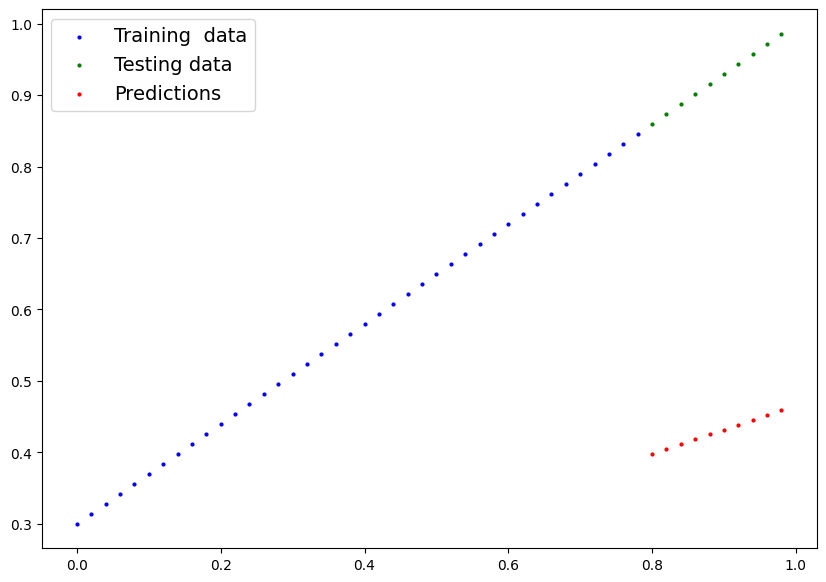

In [90]:
plot_predictions(predictions=y_preds)

See more on inference mode -> https://twitter.com/PyTorch/status/1437838231505096708?lang=en

### 3. Training a model with PyTorch

The whole idea of training or fitting is to move model from some *Unknown* parameters ( these may be random ) to some known parameters.

Or in other words from a poor representation of data to a better representation of the data.

One way to measure how poor or how wrong your model's predictions are is to use loss function. -> https://pytorch.org/docs/stable/nn.html#loss-functions

Loss function also may be called Cost function or Criterion in different literature. We will refer to it as loss function.

Things we need to train:

* **Loss function:** A function to measure *How Wrong* your model's predictions are in comparision to the ideal output.

* **Optimizer:** Take into account the loss of the model and adjusts the parameters of the model (e.g. weight and biase) https://pytorch.org/docs/stable/optim.html#module-torch.optim

And specifically for Pytorch, we need
* A training loop and
* A testing loop

In [91]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [92]:
# Checkout out model's parameters ( weight and bias)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [93]:
# Setup a loss function
loss_fn = nn.L1Loss()

loss_fn

# Setup an optimizer function ( Stochastic Gradient Descent )
# See https://pytorch.org/docs/stable/generated/torch.optim.SGD.html#sgd
optimizer = torch.optim.SGD(params=model_0.parameters(), \
                            lr= 0.01) # lr = Learning Rate - one of the most important parameters we as AI professionals set

### Building a training loop ( and a testing loop)  in PyTorch

0. A Couple of steps we need

1. Forward Pass ( also called forward propogation - this involves the data moving theough the `forward()` function to make predictions on data.
2. Calculate the loss ( Compare the predicted value with ground truth labels )
3. Optimizer zero grad
4. Loss backward - Move backwards through the network to calculate the gradient of each of the parameters of our model w. r. t. to the loss (**Backpropogation**)
5. Optimizer step - use the optimiser to adjust our models parameters to try and improve the loss (**Gradient Descent**)

In [94]:
# An epoch is one loo[p through the data ....(This is a hyper-parameter)
epochs = 200

# Track different loss values
epoch_count = []
train_loss_values = []
test_loss_values =[]

torch.manual_seed(42)

### Training ----
# 0. Loop through the data
for epoch in range(epochs):
  # Set the model in training mode
  model_0.train() # Train mode sets all the parameters in Pytorch that require gradients to `require gradients`

  # 1. Forward Pass
  y_pred = model_0(X_train)

  # 2. Calculate loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward - Move backwards through the network to calculate the gradient of each of the parameters of our model w. r. t. to the loss (Backpropogation)
  loss.backward()

  # 5. Step the optimizer - use the optimiser to adjust our models parameters to try and improve the loss (Gradient Descent)
  optimizer.step()

  # Testing
  model_0.eval() # Turns off gradient tracking
  with torch.inference_mode():
    # Forward pass
    test_preds = model_0(X_test)

    # Calculate the loss
    test_loss = loss_fn(test_preds, y_test)

    if(epoch % 5 == 0):
      print(f"Epoch: {epoch} Train Loss: {loss} Test Loss: {test_loss}")
      epoch_count.append(epoch)
      train_loss_values.append(loss.numpy())
      test_loss_values.append(test_loss.numpy())


  #print("Loss:", loss)
  #print("Model State", model_0.state_dict())


Epoch: 0 Train Loss: 0.31288138031959534 Test Loss: 0.48106518387794495
Epoch: 5 Train Loss: 0.2552763521671295 Test Loss: 0.41371020674705505
Epoch: 10 Train Loss: 0.1976713240146637 Test Loss: 0.3463551998138428
Epoch: 15 Train Loss: 0.14006635546684265 Test Loss: 0.27900025248527527
Epoch: 20 Train Loss: 0.08908725529909134 Test Loss: 0.21729660034179688
Epoch: 25 Train Loss: 0.06395438313484192 Test Loss: 0.17353470623493195
Epoch: 30 Train Loss: 0.053148526698350906 Test Loss: 0.14464017748832703
Epoch: 35 Train Loss: 0.04819351062178612 Test Loss: 0.12584610283374786
Epoch: 40 Train Loss: 0.04543796554207802 Test Loss: 0.11360953003168106
Epoch: 45 Train Loss: 0.04343796148896217 Test Loss: 0.10470950603485107
Epoch: 50 Train Loss: 0.04167863354086876 Test Loss: 0.09919948130846024
Epoch: 55 Train Loss: 0.039933640509843826 Test Loss: 0.09368947893381119
Epoch: 60 Train Loss: 0.03818932920694351 Test Loss: 0.08886633068323135
Epoch: 65 Train Loss: 0.03647511452436447 Test Loss: 0

In [95]:
with torch.inference_mode():
  y_new_preds = model_0(X_test)

y_new_preds, y_test

(tensor([[0.8685],
         [0.8825],
         [0.8965],
         [0.9105],
         [0.9245],
         [0.9384],
         [0.9524],
         [0.9664],
         [0.9804],
         [0.9944]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

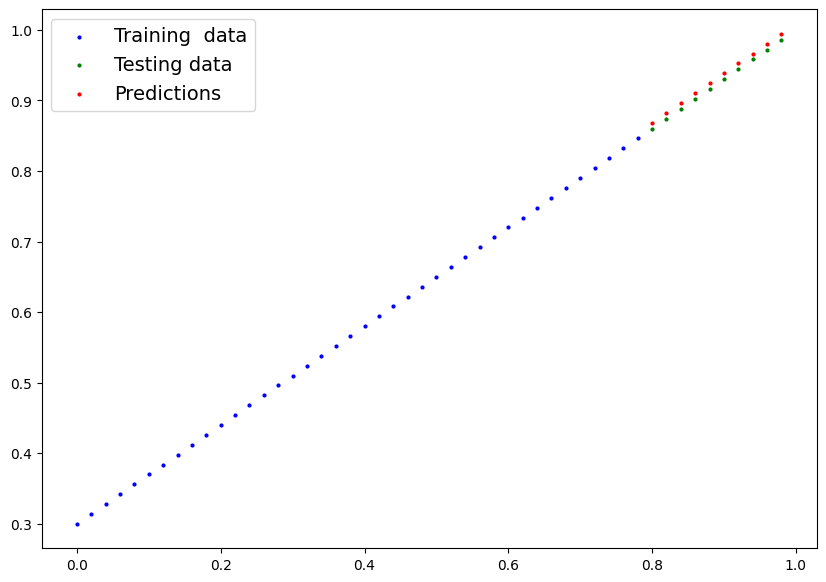

In [96]:
plot_predictions(predictions=y_new_preds)

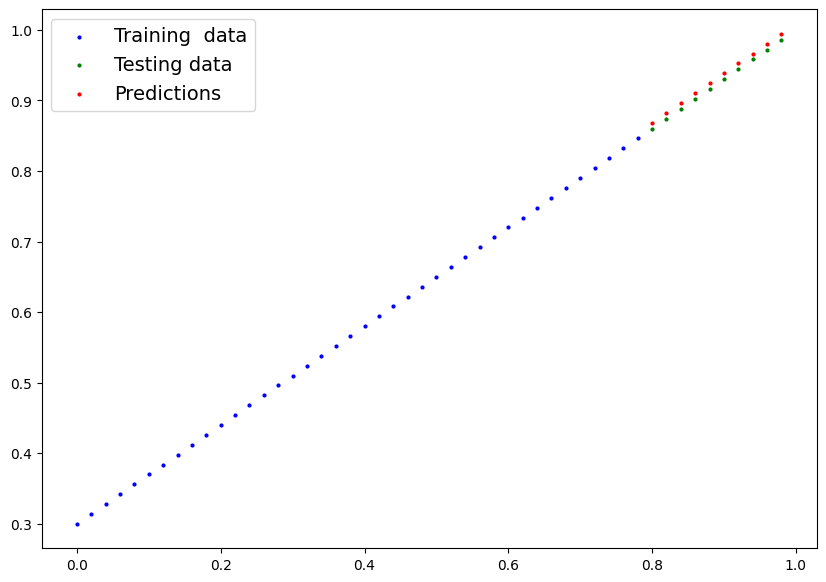

In [97]:
plot_predictions(predictions=y_new_preds)

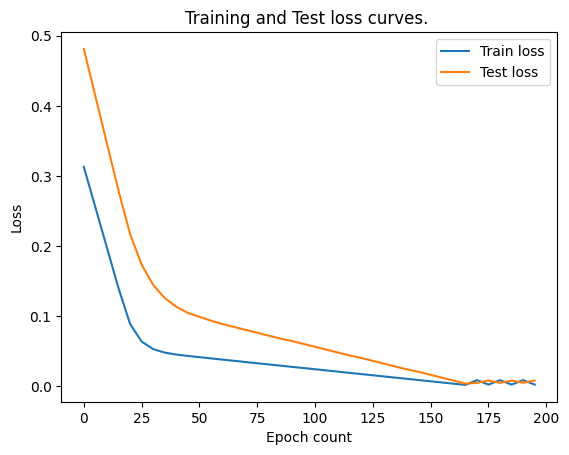

In [98]:
# Plot the train vs test loss curve
#(epoch_count, train_loss_values, test_loss_values)
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and Test loss curves. ")
plt.xlabel("Epoch count")
plt.ylabel("Loss")
plt.legend()

In [99]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [100]:
model_0

LinearRegressionModel()

### Saving a model

There are three main methods in which we can save models in PyTorch.
1. `torch.save()`- allows us to save object in Python's pickle format.
2. `torch.load()` - allows us to load a PyTorch object.
3. `torch.nn.Module.saved_state_dict()` - This allows us to laod a saved dictionary of the model.

Saving and loading model in PyTorch tutorial - https://pytorch.org/tutorials/beginner/saving_loading_models.html

In [101]:
# Saving the model to Google Colab
from pathlib import Path

# 1. Create a models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok = True)

# 2. Model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model to model path
print(f"Saving the model to: {MODEL_SAVE_PATH}")
torch.save(obj= model_0.state_dict(),
           f= MODEL_SAVE_PATH)

Saving the model to: models/01_pytorch_workflow_model_0.pth


In [102]:
# 4. Loading the model
model_reloaded = LinearRegressionModel()
state_dict = torch.load(f=MODEL_SAVE_PATH)
model_reloaded.load_state_dict(state_dict= state_dict)

<All keys matched successfully>

In [103]:
model_reloaded.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

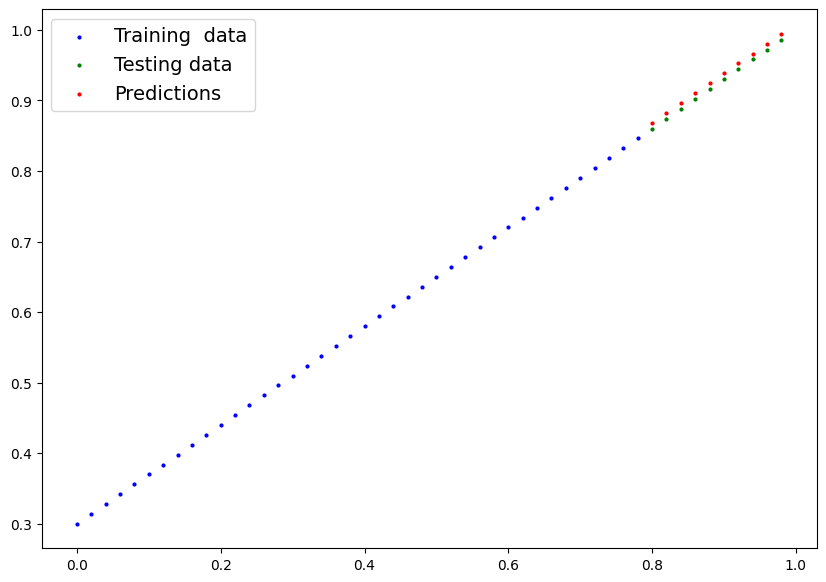

In [104]:
model_reloaded.eval()

with torch.inference_mode():
  y_reloaded_preds = model_reloaded(X_test)

plot_predictions(predictions= y_reloaded_preds)

In [105]:
# Save the whole model
MODEL_NEW_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_NEW_PATH = MODEL_PATH / MODEL_NEW_NAME

torch.save(model_0,
           f= MODEL_NEW_PATH)

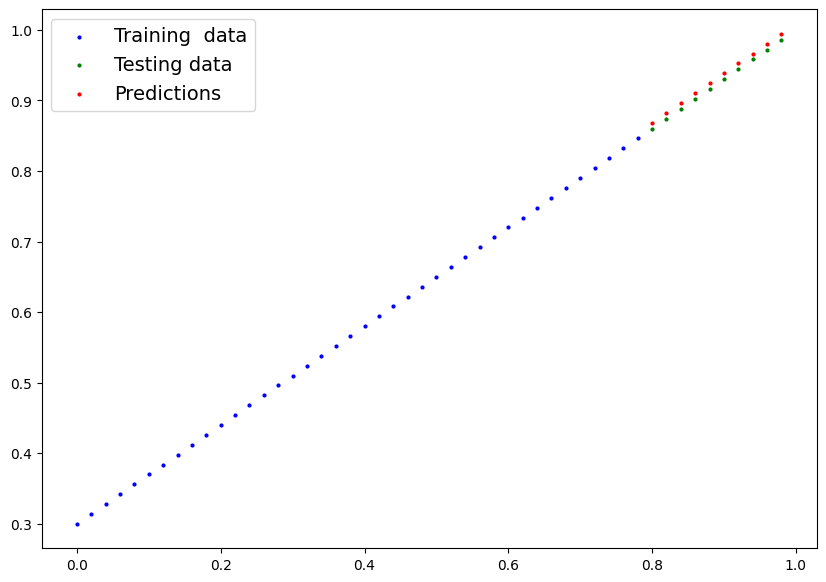

In [106]:
# Load a new model from the saved model
model_0_whole = torch.load(MODEL_NEW_PATH)

model_0_whole.eval()
with torch.inference_mode():
  y_latest_preds = model_0_whole(X_test)

plot_predictions(predictions= y_latest_preds)

### 6. Putting it all together

Let's go through all the abobe steps in one go, at one place

In [107]:
# Import
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check torch version
torch.__version__

'2.1.0+cu121'

Create device agnostic code.

This means if our device has got a GPU, the code will run using the GPU (for potentially faster computing)

If not GPU is availbale then code will run on CPU.

In [108]:
# Check for availability of GPU and set up device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [109]:
!nvidia-smi

Tue Jan 23 09:19:45 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   68C    P0              31W /  70W |    159MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

6.1 - Data

In [110]:
# Create some data using the linear regression formula of y = weight*X + bias
weight = 0.7
bias = 0.3

# Start, end , step
start = 0
end = 1
step = 0.02

# Create input data
X = torch.arange(start= start,
                 end= end,
                 step= step,
                 device= device).unsqueeze(dim= 1)

# Create y
y = weight*X + bias

y, y.shape

(tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [0.4680],
         [0.4820],
         [0.4960],
         [0.5100],
         [0.5240],
         [0.5380],
         [0.5520],
         [0.5660],
         [0.5800],
         [0.5940],
         [0.6080],
         [0.6220],
         [0.6360],
         [0.6500],
         [0.6640],
         [0.6780],
         [0.6920],
         [0.7060],
         [0.7200],
         [0.7340],
         [0.7480],
         [0.7620],
         [0.7760],
         [0.7900],
         [0.8040],
         [0.8180],
         [0.8320],
         [0.8460],
         [0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]], device='cuda:0'),
 torch.Size([50, 1]))

In [111]:
# Split data into train and test
train_size = int(0.8 * len(X))


X_train, X_test = X[ : train_size], X[train_size : ]
y_train, y_test = y[ : train_size], y[train_size : ]

len(X_train), len(X_test)

(40, 10)

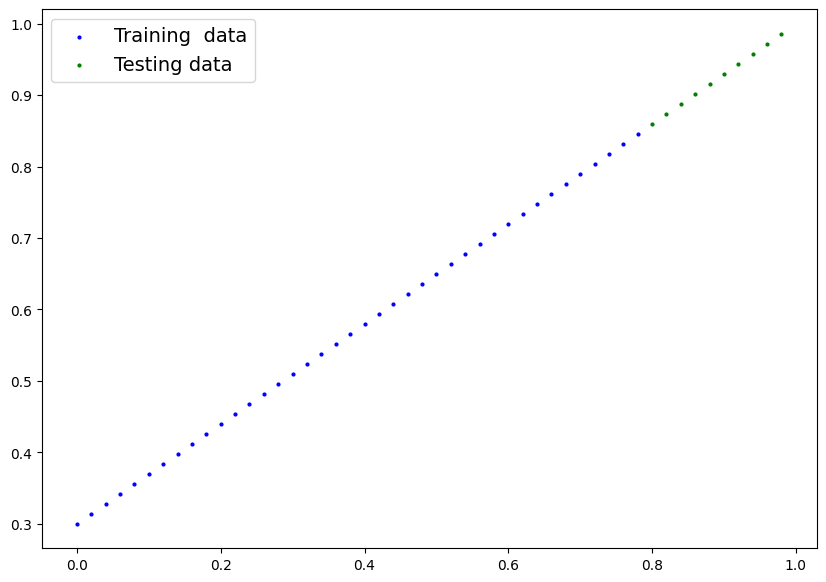

In [112]:
# Plot the data
plot_predictions(X_train.cpu().numpy(), y_train.cpu().numpy(), X_test.cpu().numpy(), y_test.cpu().numpy())


# 6.2 Building a Pytorch Model

In [113]:
# Create a LinearRegressionModel

from torch import nn

class LinearRegressionModel_New(nn.Module):
  def __init__(self):
    super().__init__()
    #self.weight = nn.Parameter(torch.randn(1,
    #                                       requires_grad= True,
    #                                       dtype= float))
    #self.bias = nn.Parameter(torch.randn(1,
    #                                     requires_grad= True,
    #                                     dtype= float))

    # Pararameters using nn.Linear() for creating model parameters / also called linear layer, linear transform, dense layer, fully connected, probing
    self.linear_layer = nn.Linear(in_features= 1,
                            out_features= 1)

  def forward(self, x: torch.Tensor) -> torch.Tensor: # x is the input tensor
    #return self.weight*x + bias # returns the predicted value by applying regression
    return self.linear_layer(x)


In [114]:
X_train[:5], y_train[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]], device='cuda:0'),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]], device='cuda:0'))

[Parameter containing:
tensor([[0.7645]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([0.8300], device='cuda:0', requires_grad=True)]
cuda
cuda:0


(tensor([[1.4416],
         [1.4569],
         [1.4722],
         [1.4875],
         [1.5028],
         [1.5181],
         [1.5334],
         [1.5487],
         [1.5640],
         [1.5793]], device='cuda:0'),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]], device='cuda:0'))

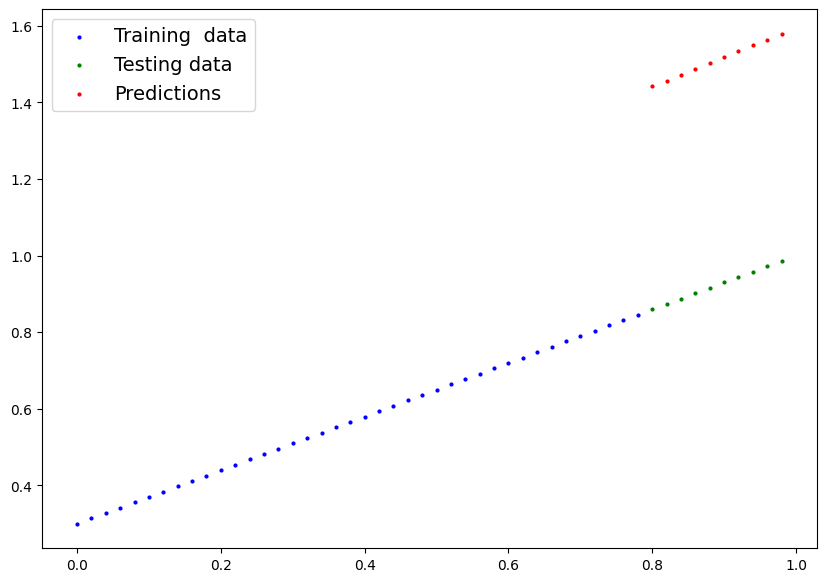

In [115]:
# Set Random Seed
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)

# Create a model object
new_model_0 = LinearRegressionModel_New().to(device)
print(list(new_model_0.parameters()))
print(device)

#Using the test input data  make predictions
with torch.inference_mode():
  X_test = X_test.to(device)
  print(X_test.device)
  y_predicted = new_model_0(X_test)

plot_predictions(predictions= y_predicted.cpu())

y_predicted, y_test

In [116]:
new_model_0, new_model_0.state_dict()

(LinearRegressionModel_New(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]], device='cuda:0')),
              ('linear_layer.bias', tensor([0.8300], device='cuda:0'))]))

In [117]:
# Check the current device of the model
next(new_model_0.parameters()).device
new_model_0.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.8300], device='cuda:0'))])

## 6.3 Training

For training we require
* Loss function
* Optimiser
* Training loop
* Testing loop

In [118]:
# Setup loss function
loss_fn_new = nn.L1Loss() # same as MAE - Mean Absolute Loss

# Setup optimizer function
optimizer_new = torch.optim.SGD(params= new_model_0.parameters(), lr= 0.01)

In [119]:
# Write training loop
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)

# Put data on the target device
#X_train, X_test = X_train.to(device), X_test.to(device)
#y_train, y_test = y_train.to(device), y_test.to(device)

epochs = 500

for epoch in range(epochs):
  new_model_0.train()

  # 1. Do the forard pass
  y_preds_new = new_model_0(X_train)

  # 2. Calculate the loss
  new_loss = loss_fn_new(y_preds_new, y_train)

  # 3. Optimizer zero Grad
  optimizer_new.zero_grad # Resets the gradients all the optimised tensors, prepares the model for the next epoch run

  # 4. Perform backword propogation
  new_loss.backward()

  # 5. Optimiser step
  optimizer_new.step()

  ## Testing
  new_model_0.eval()
  with torch.inference_mode():
    test_preds_new = new_model_0(X_test)
    test_loss_new = loss_fn_new(test_preds_new, y_test)

  # Print to see progress
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {new_loss} | Test Loss {test_loss_new} ")

Epoch: 0 | Loss: 0.5551779866218567 | Test Loss 0.5739762187004089 
Epoch: 10 | Loss: 0.07653241604566574 | Test Loss 0.26966753602027893 
Epoch: 20 | Loss: 0.5755314826965332 | Test Loss 0.7160065174102783 
Epoch: 30 | Loss: 0.07554610818624496 | Test Loss 0.15370561182498932 
Epoch: 40 | Loss: 0.5932031273841858 | Test Loss 0.6298026442527771 
Epoch: 50 | Loss: 0.0412398986518383 | Test Loss 0.21425841748714447 
Epoch: 60 | Loss: 0.5604729056358337 | Test Loss 0.6811314821243286 
Epoch: 70 | Loss: 0.07239407300949097 | Test Loss 0.17215359210968018 
Epoch: 80 | Loss: 0.5900511145591736 | Test Loss 0.6482505202293396 
Epoch: 90 | Loss: 0.044391930103302 | Test Loss 0.1958104372024536 
Epoch: 100 | Loss: 0.5636249780654907 | Test Loss 0.6626834273338318 
Epoch: 110 | Loss: 0.06924203783273697 | Test Loss 0.19060154259204865 
Epoch: 120 | Loss: 0.5868990421295166 | Test Loss 0.6666985154151917 
Epoch: 130 | Loss: 0.0475439690053463 | Test Loss 0.17736245691776276 
Epoch: 140 | Loss: 0.5

In [120]:
new_model_0.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.4076]], device='cuda:0')),
             ('linear_layer.bias', tensor([-0.1065], device='cuda:0'))])